# Project University Mental Health

## Part 2: Data visualization and statistics

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Read the CSV from Part I
df = pd.read_csv('data_cleaned.csv')
df

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [4]:
# Step 3: Use dtypes to check out the type of data is found in each column
df.dtypes

inter_dom           object
Region              object
Gender              object
Academic            object
Age                float64
Age_cate           float64
Stay               float64
Stay_Cate           object
Japanese           float64
Japanese_cate       object
English            float64
English_cate        object
Intimate            object
Religion            object
Suicide             object
Dep                 object
DepType             object
ToDep              float64
DepSev              object
ToSC               float64
APD                float64
AHome              float64
APH                float64
Afear              float64
ACS                float64
AGuilt             float64
AMiscell           float64
ToAS               float64
Partner            float64
Friends            float64
Parents            float64
Relative           float64
Profess            float64
 Phone             float64
Doctor             float64
Reli               float64
Alone              float64
O

### Step 4: Split main DataFrame into two separate ones
Since there are many columns and we have two kinds of data types in all columns, we can consider splitting the DataFrame into two separate DataFrames:
1. with only dtype of float64 (float)
2. with only dtype of object (string)

In [5]:
# Step 4a: Get your float-only DataFrame
df_float = df.select_dtypes(include = 'number')
df_float

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
0,24.0,4.0,5.0,3.0,5.0,0.0,34.0,23.0,9.0,11.0,...,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,3.0
1,28.0,5.0,1.0,4.0,4.0,2.0,48.0,8.0,7.0,5.0,...,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,3.0
2,25.0,4.0,6.0,4.0,4.0,2.0,41.0,13.0,4.0,7.0,...,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
3,29.0,5.0,1.0,2.0,3.0,3.0,37.0,16.0,10.0,10.0,...,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,3.0
4,28.0,5.0,1.0,1.0,3.0,3.0,37.0,15.0,12.0,5.0,...,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,21.0,3.0,4.0,5.0,4.0,8.0,27.0,16.0,9.0,10.0,...,7.0,5.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,6.0
264,22.0,3.0,3.0,3.0,4.0,2.0,48.0,8.0,10.0,5.0,...,7.0,7.0,7.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0
265,19.0,2.0,1.0,5.0,3.0,9.0,47.0,8.0,7.0,5.0,...,7.0,7.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,2.0
266,19.0,2.0,1.0,5.0,3.0,1.0,43.0,8.0,12.0,5.0,...,5.0,7.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,2.0


In [6]:
# Step 4b: Get your object-only DataFrame
df_object = df.select_dtypes(include=  'object')
df_object

,inter_dom,Region,Gender,Academic,Stay_Cate,Japanese_cate,English_cate,Intimate,Religion,Suicide,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,Long,Average,High,NaN,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,Short,High,High,NaN,No,No,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,Long,High,High,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,Short,Low,Average,No,No,No,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,Short,Low,Average,Yes,No,No,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,Long,High,High,No,Yes,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,Medium,Average,High,Yes,Yes,No,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,Short,High,Average,No,No,No,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


## Univariate analysis 
Univariate analysis is a form of analysis where we analyze the values in one column, e.g., distribution. 

With columns with numerical variables, we'll use a histogram. On the other hand, for columns with categorical values, we can use a countplot from seaborn, i.e. a plot that counts the frequency of the categorical values in each column. 

There are a lot of columns in the DataFrame that we're working with, and everything seems interesting. We will use a for loop to loop through all the columns to plot the values in them.

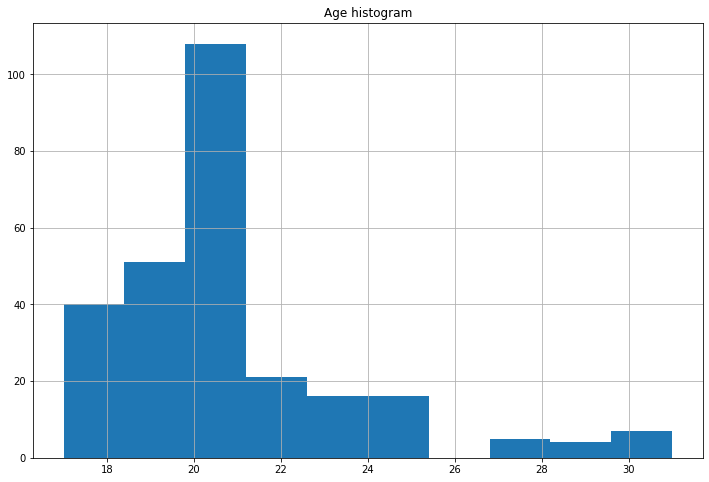

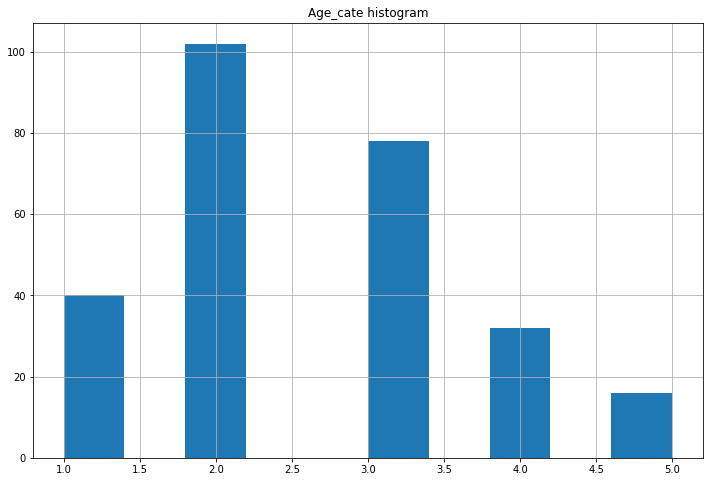

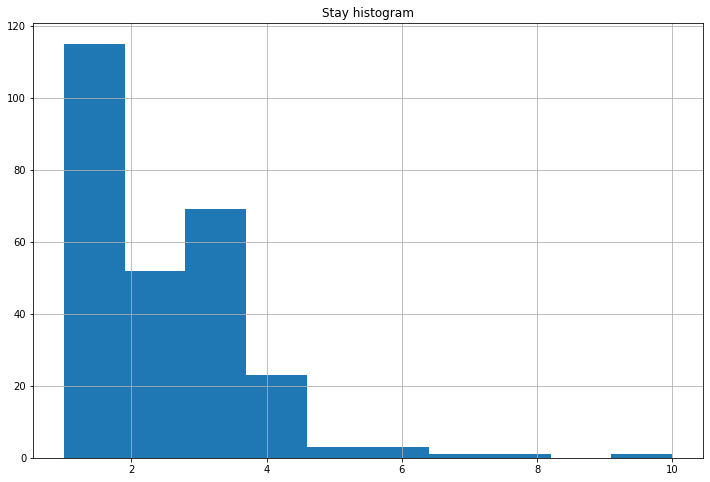

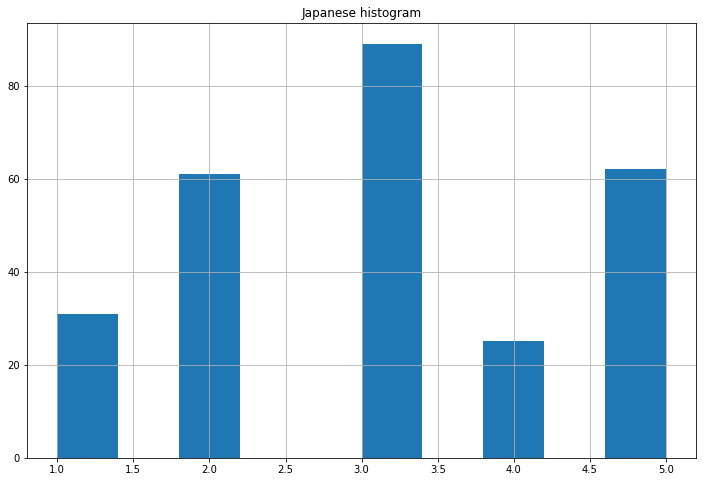

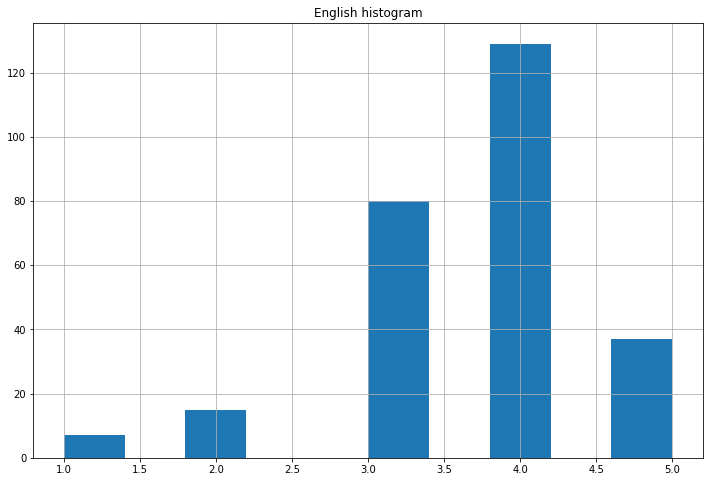

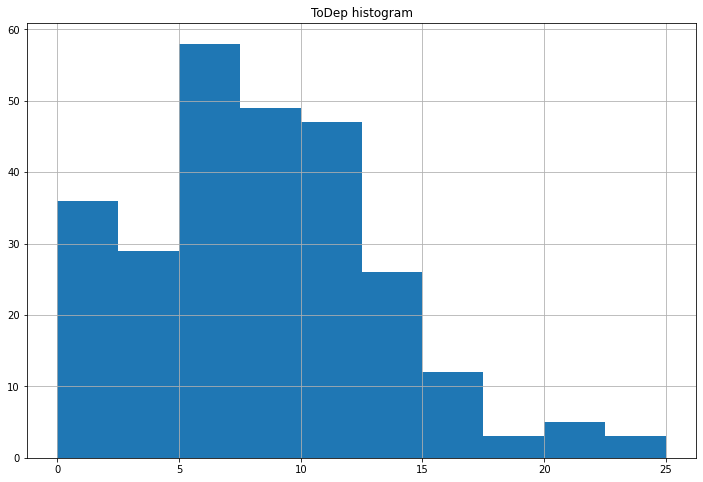

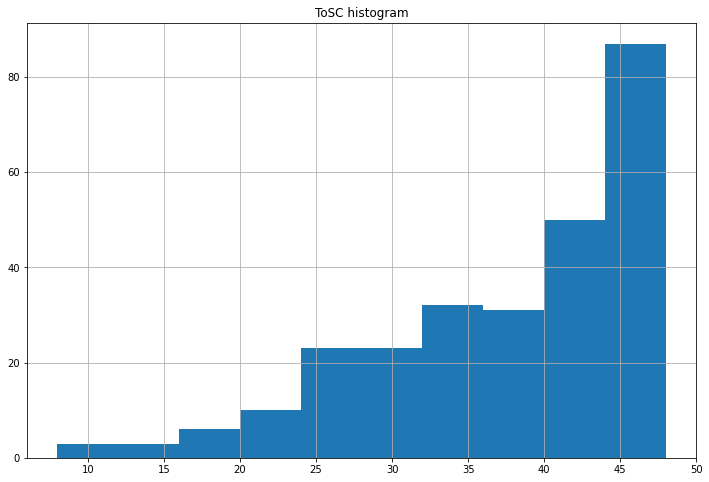

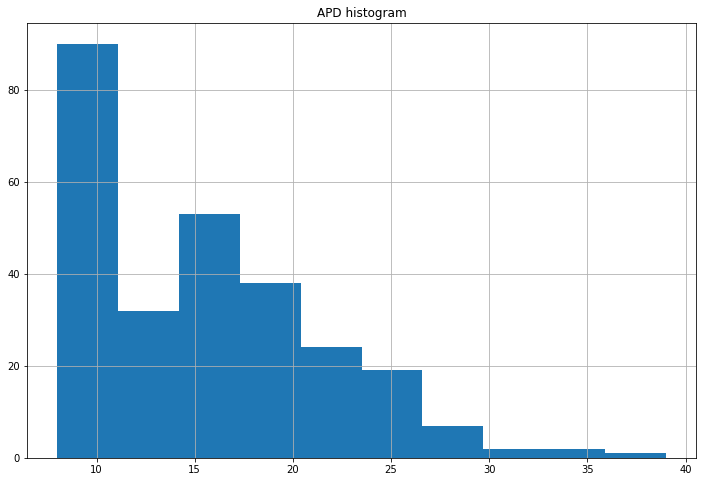

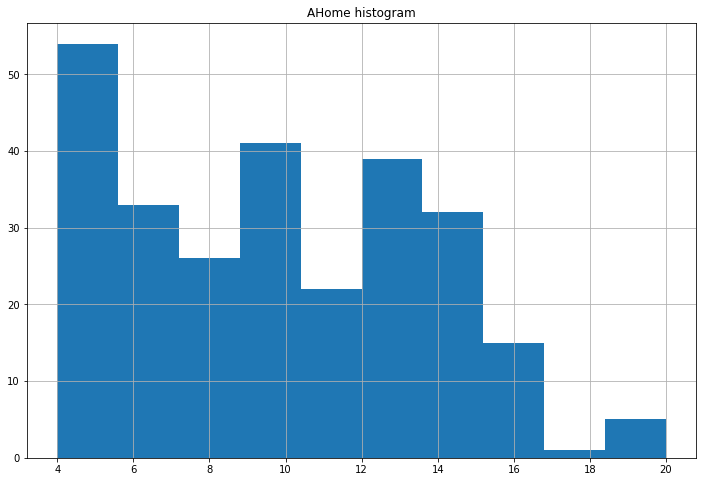

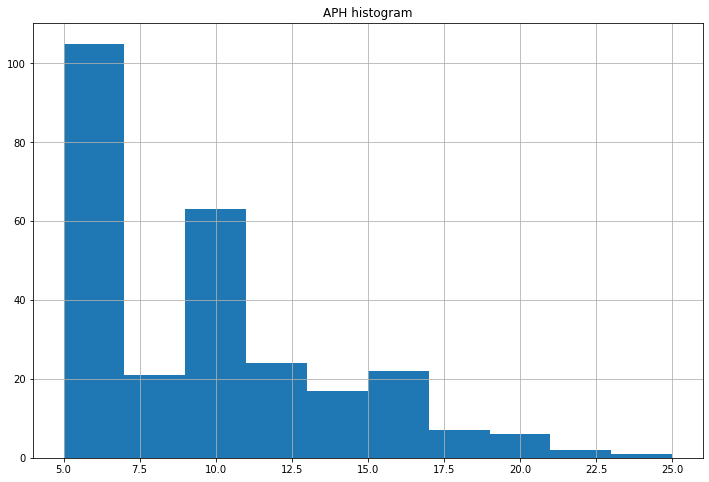

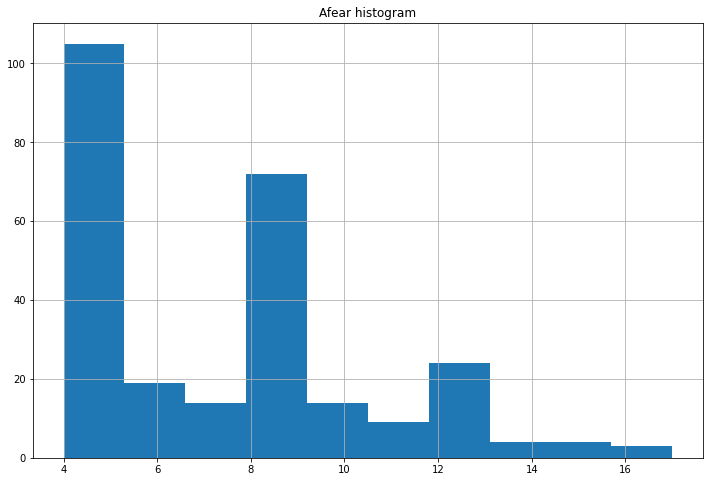

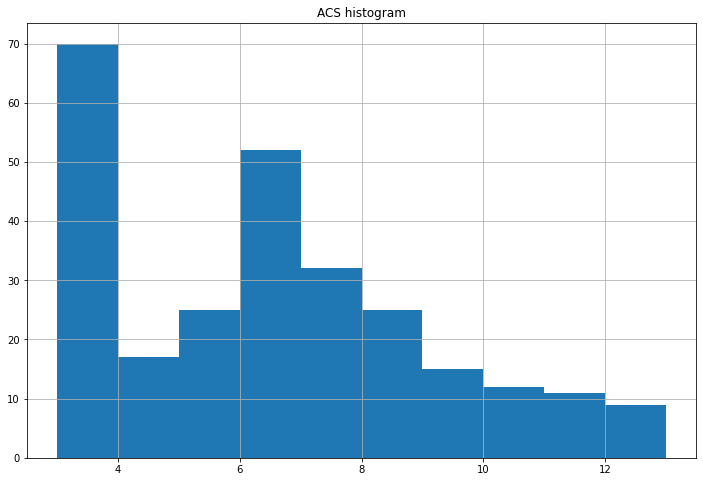

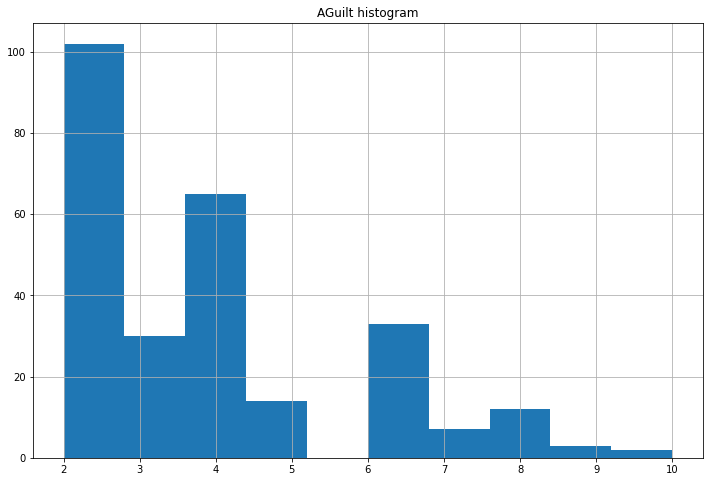

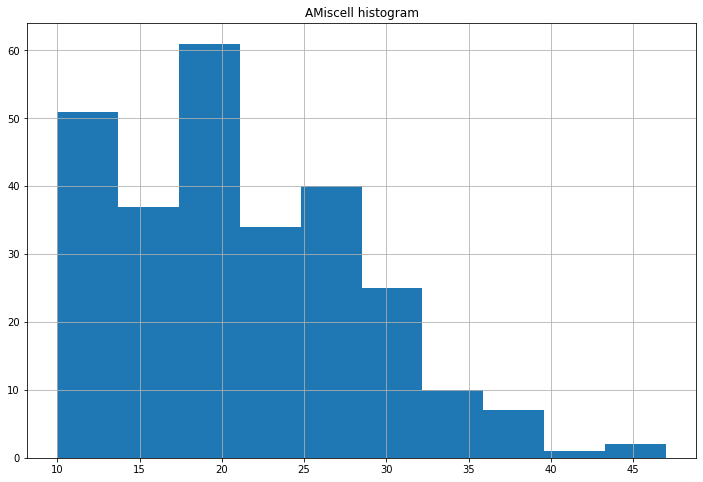

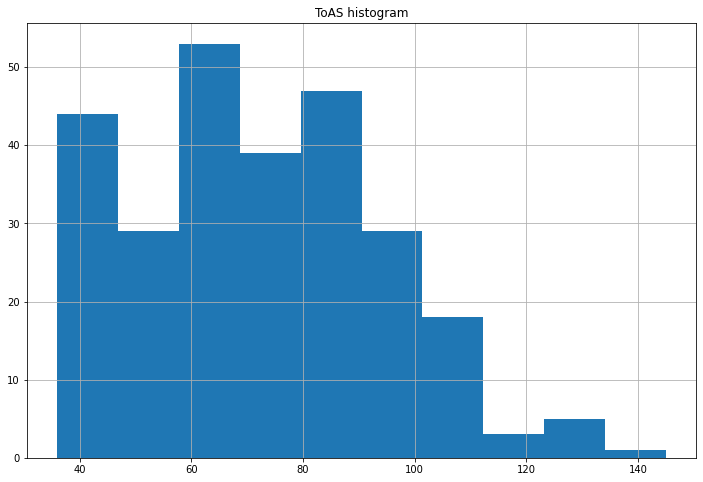

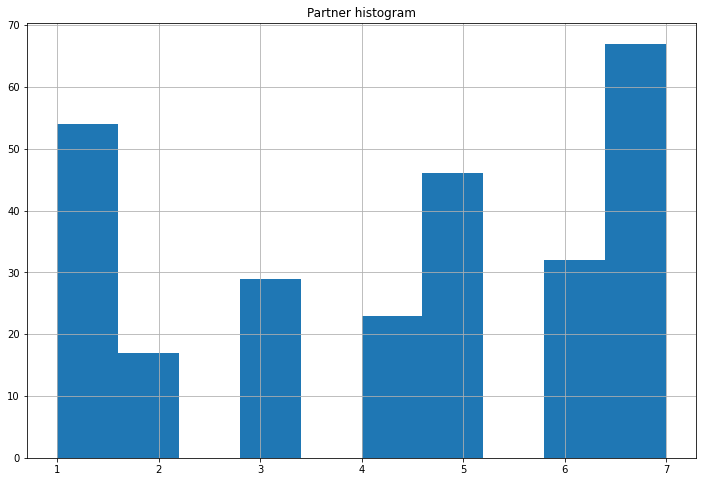

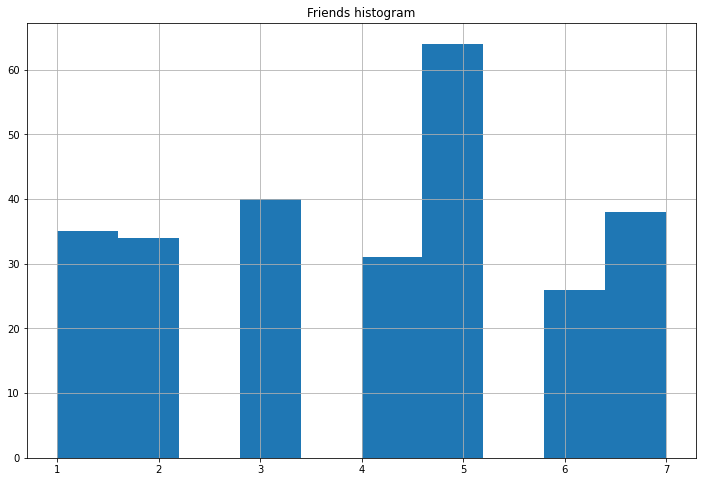

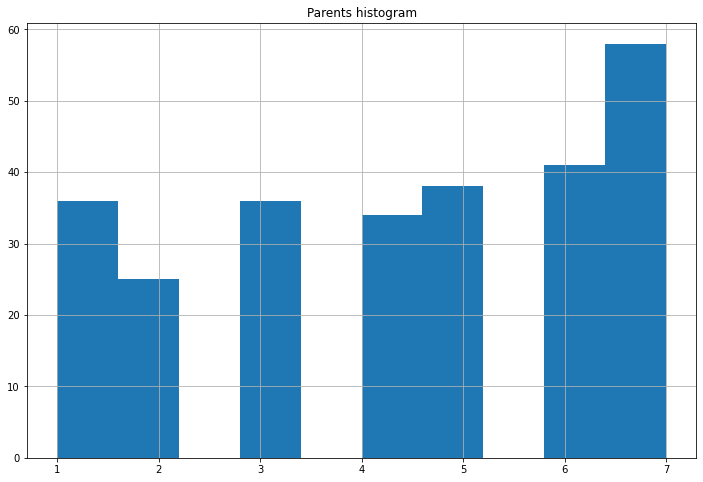

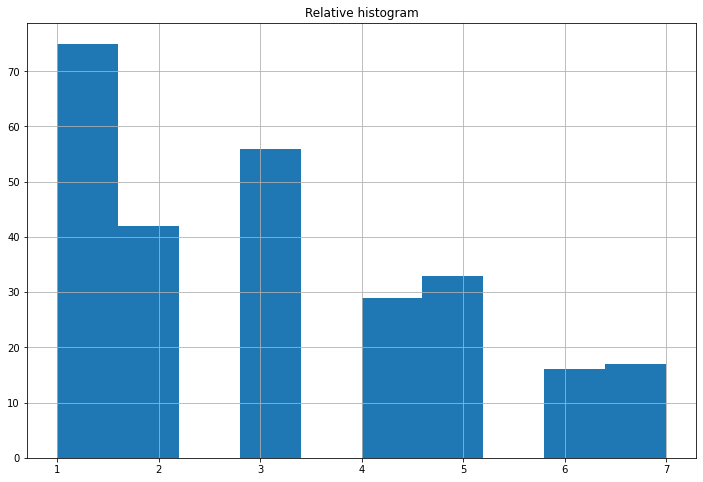

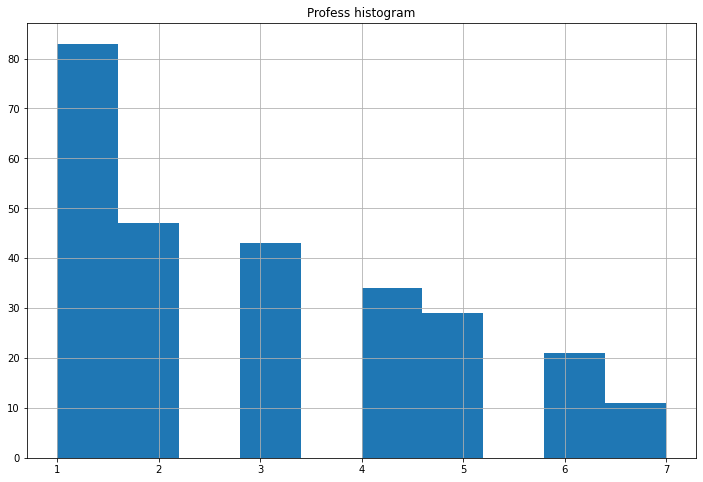

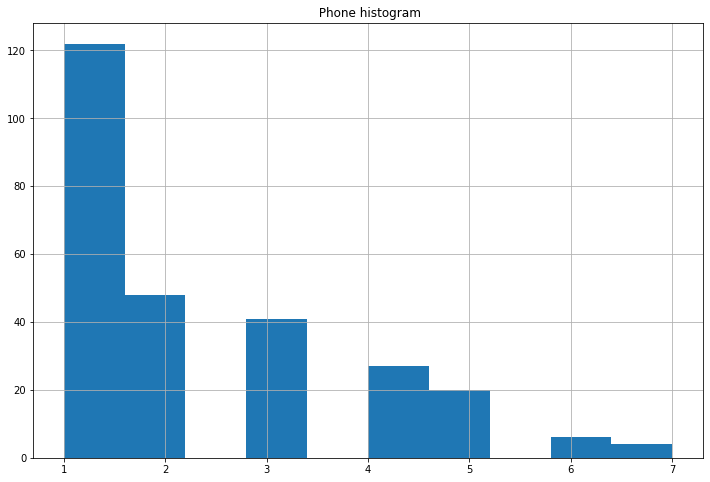

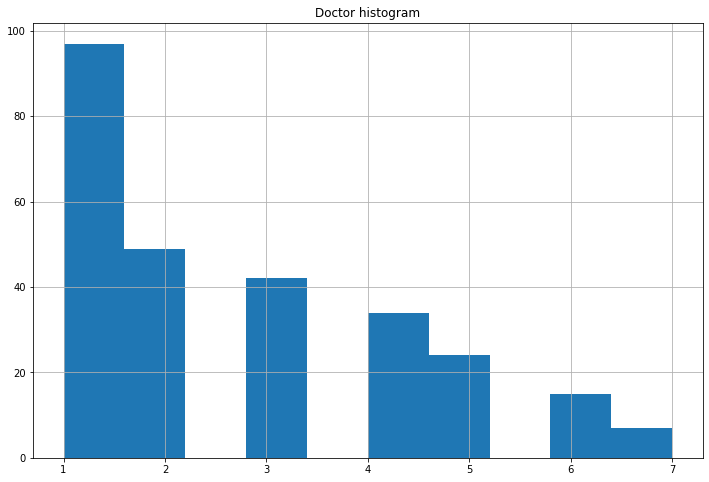

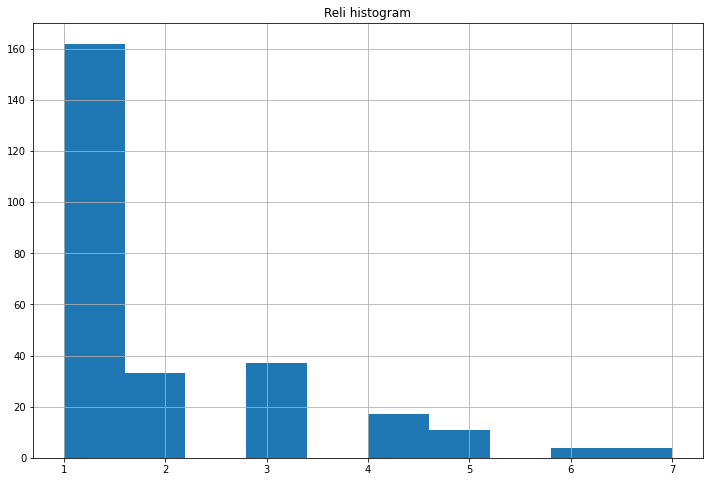

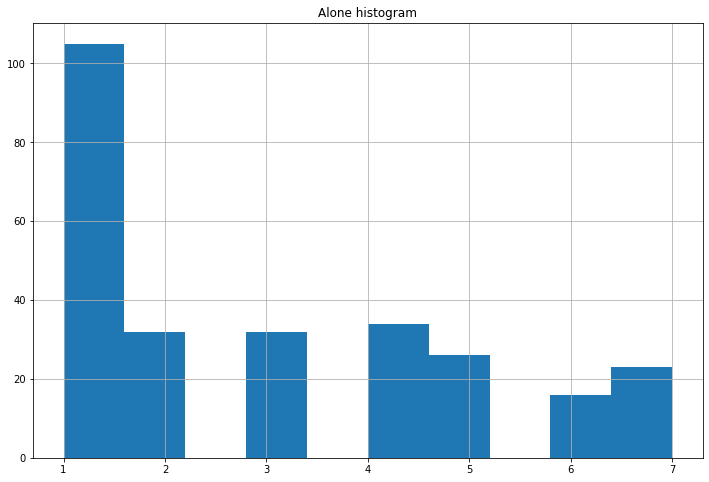

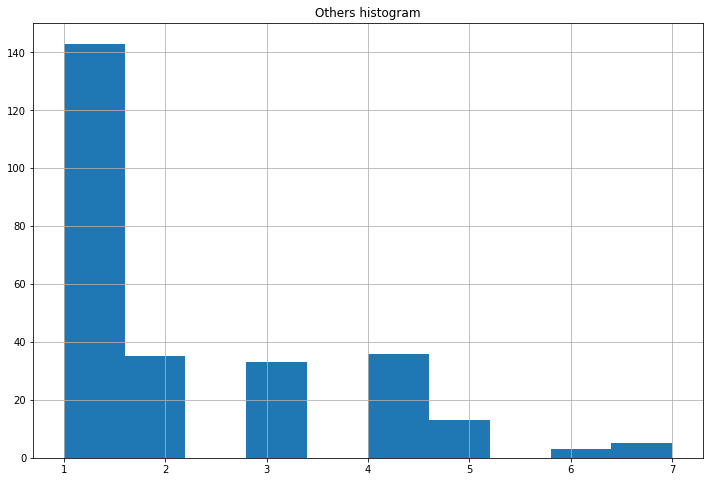

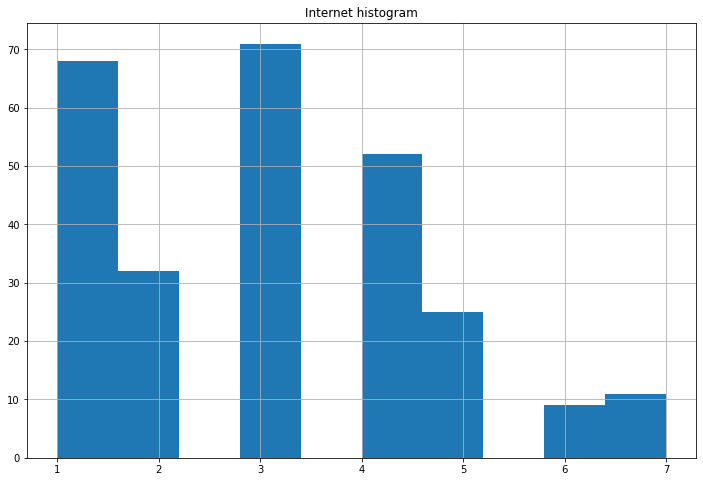

In [7]:
# Step 5: Plot the numeric column values iteratively
for column in df_float.columns:
    plt.figure(figsize = (12,8))
    df_float[column].hist()
    plt.title(column + " histogram")
    plt.show()

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


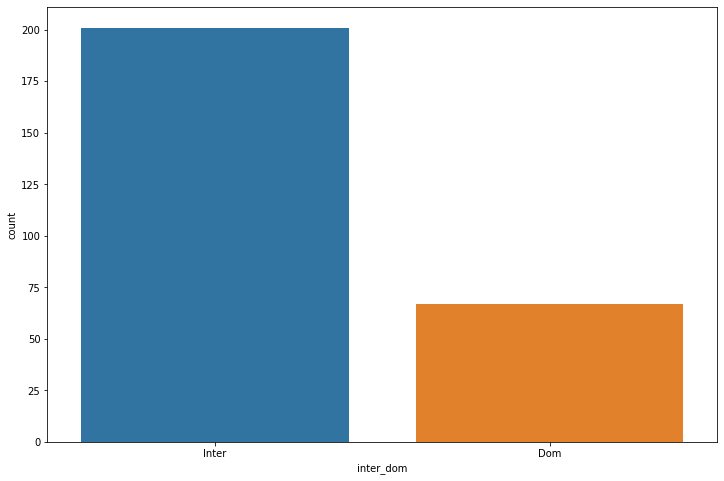

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


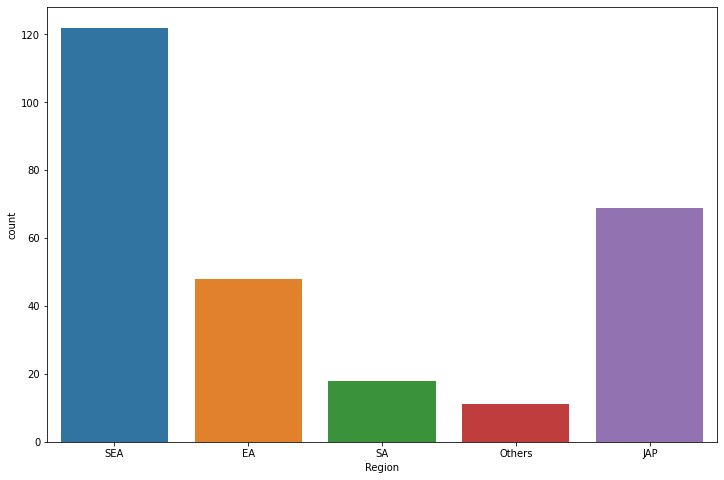

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


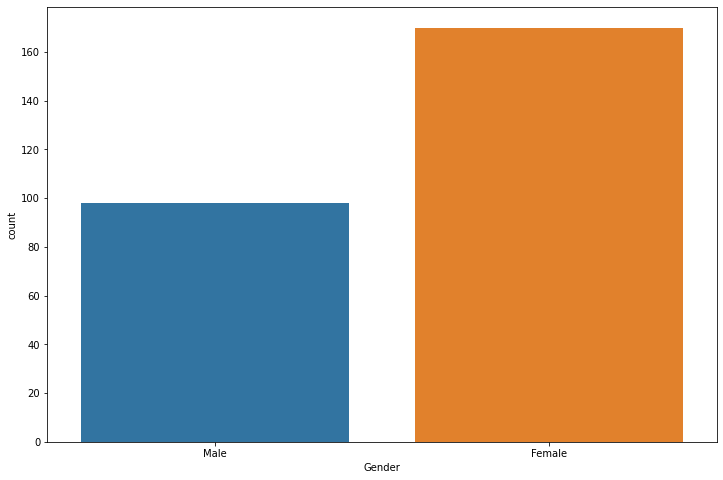

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


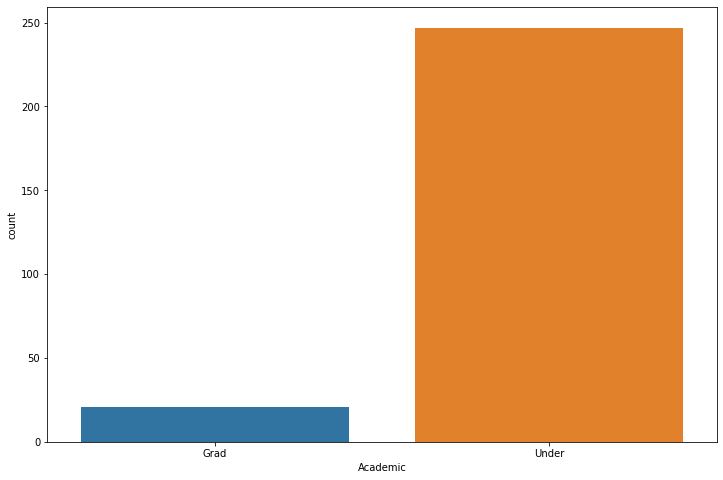

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


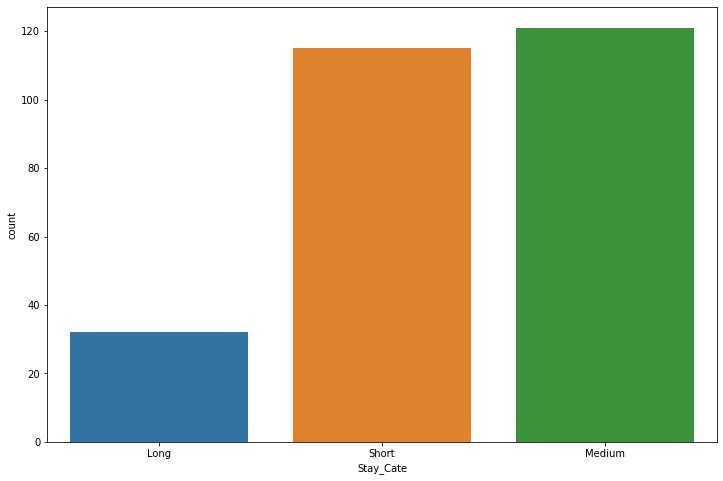

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


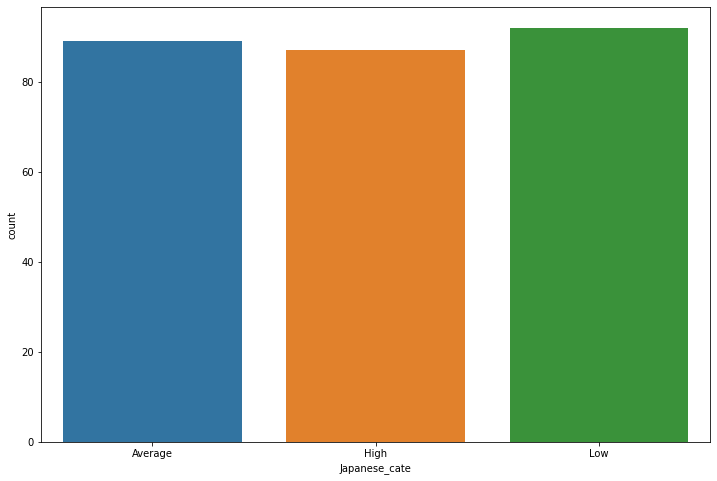

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


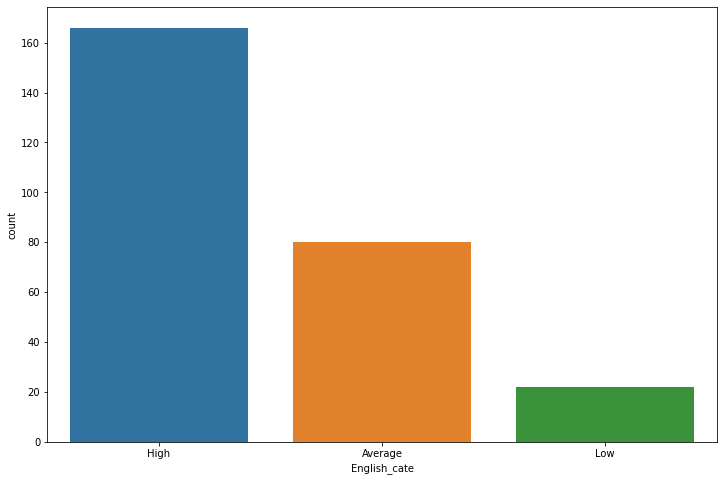

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


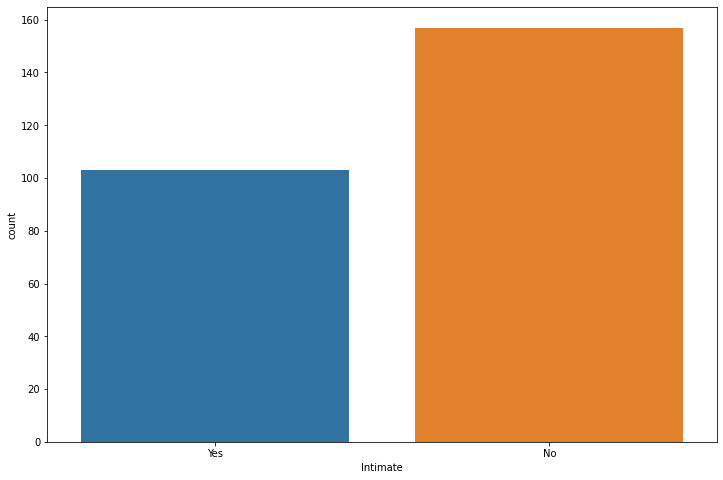

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


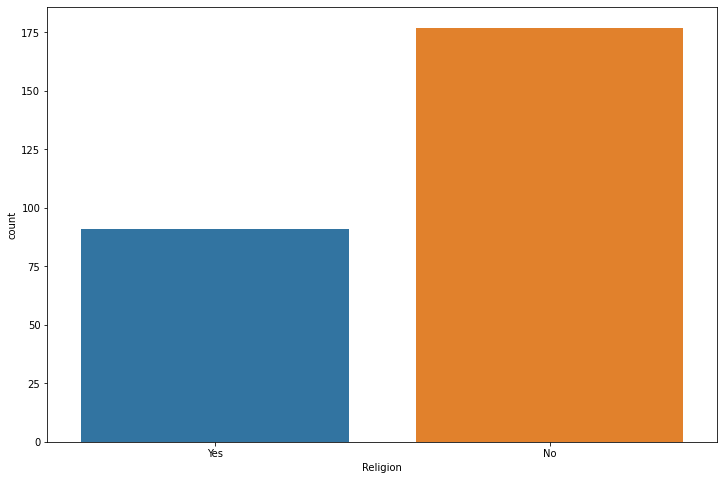

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


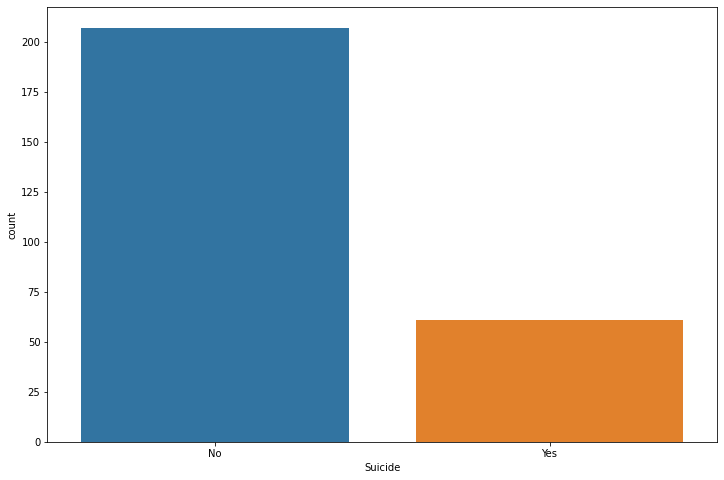

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


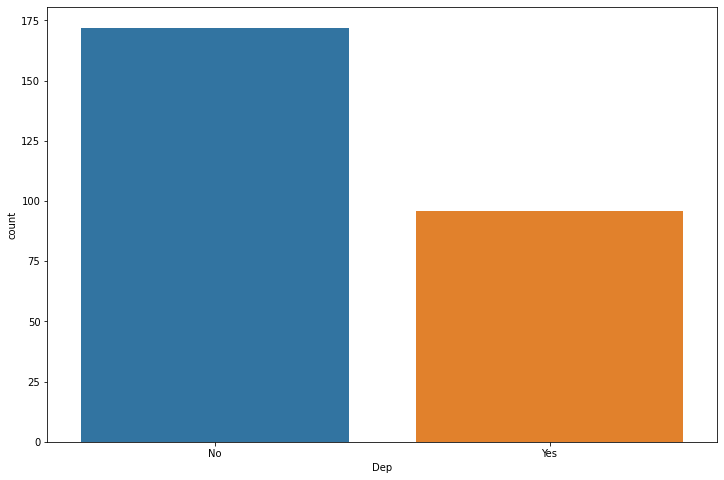

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


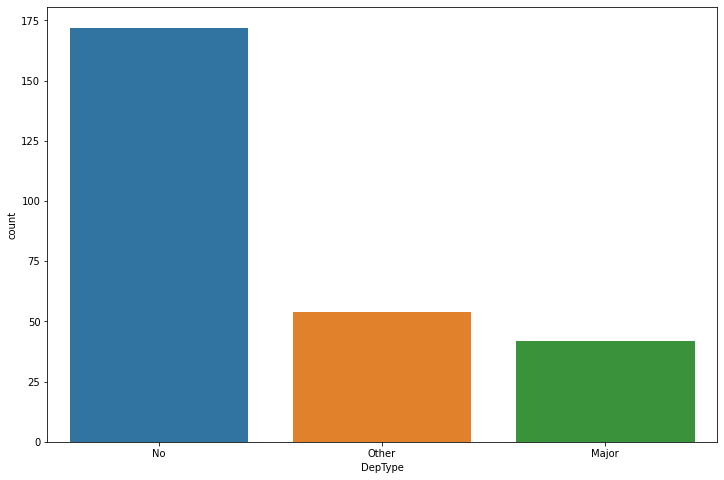

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


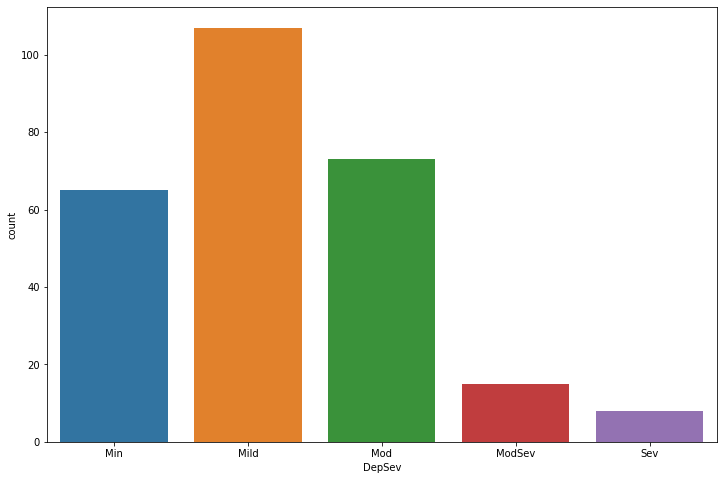

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


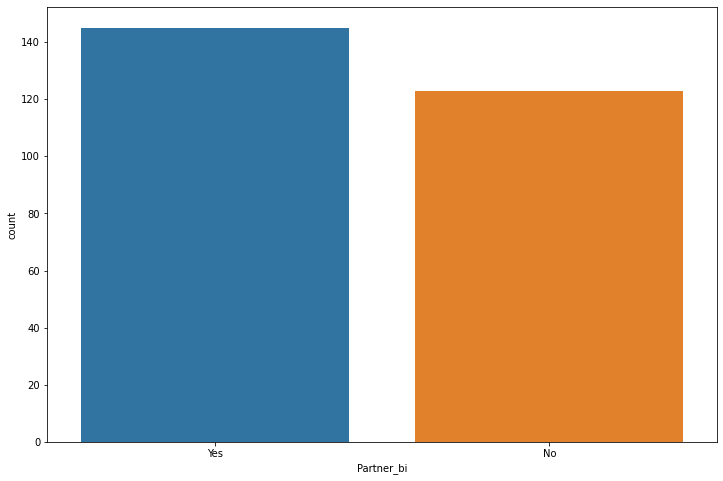

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


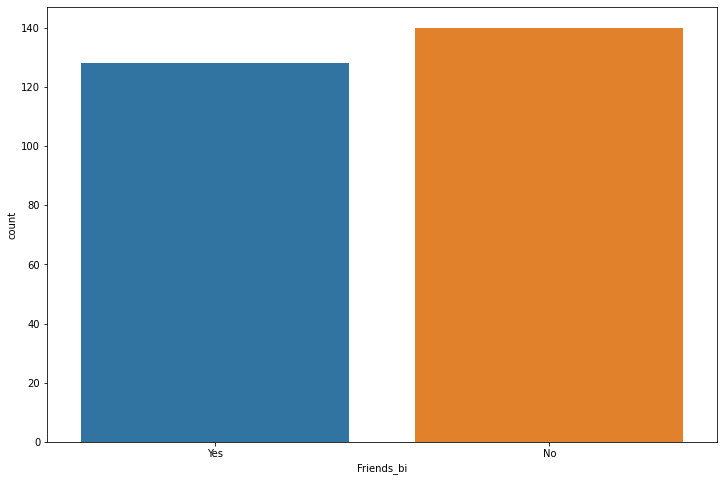

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


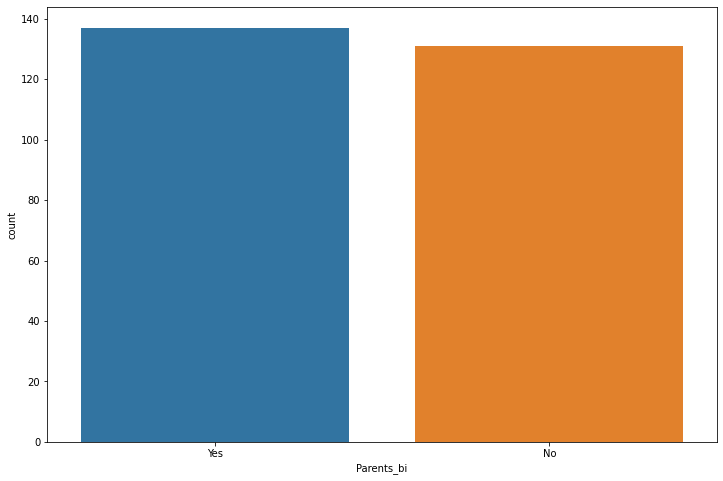

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


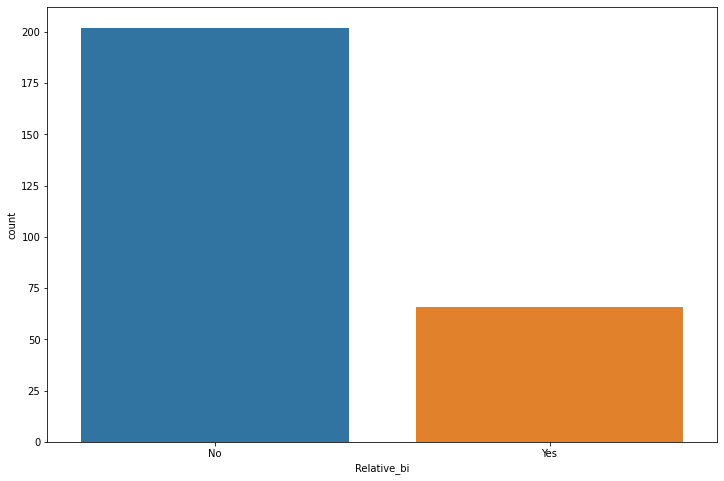

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


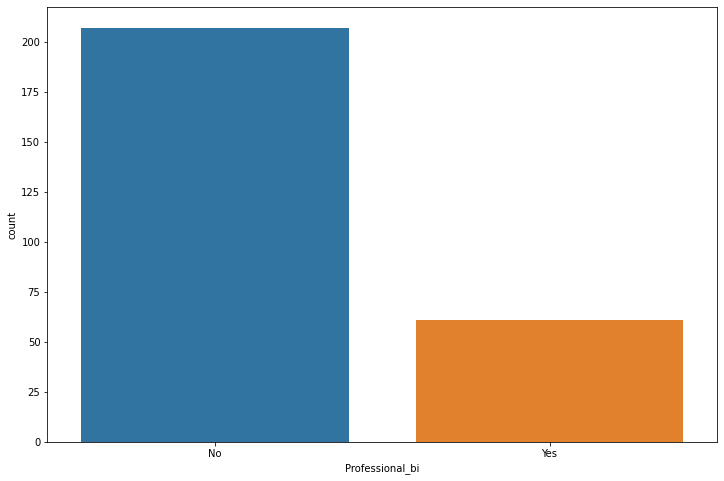

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


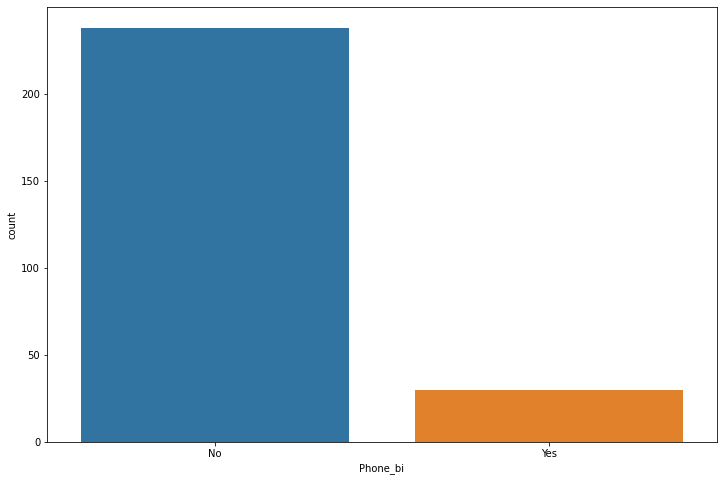

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


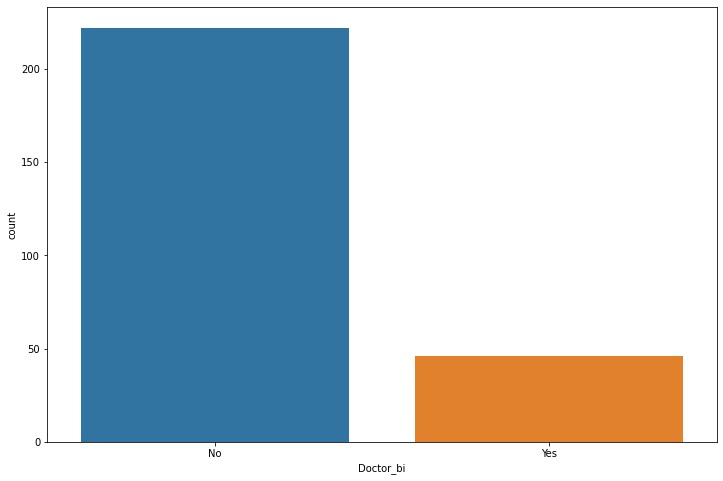

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


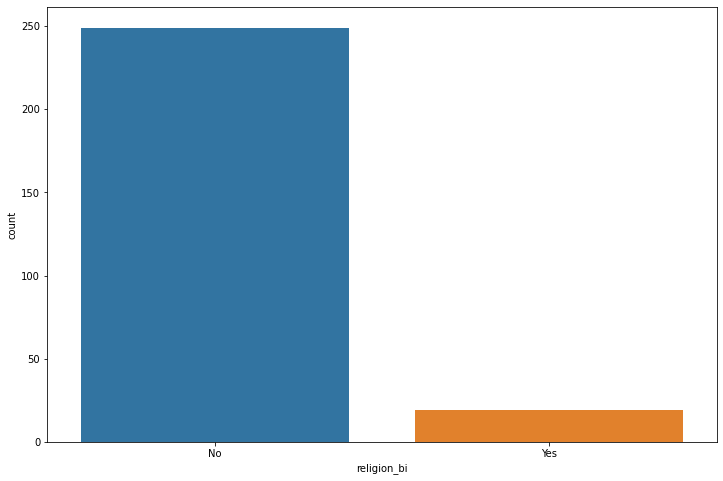

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


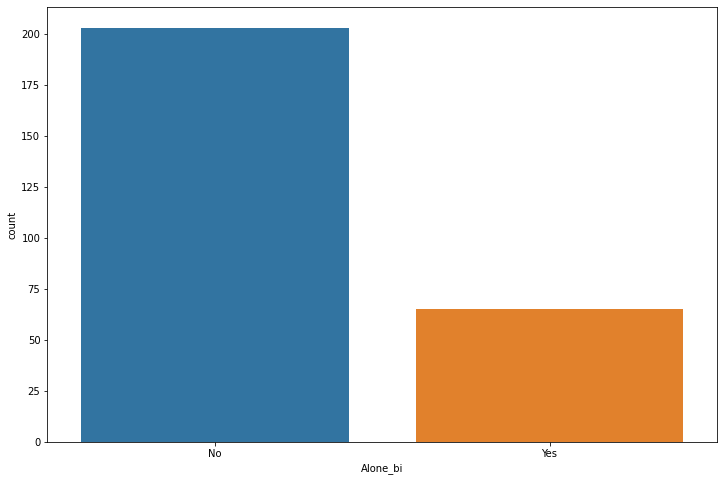

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


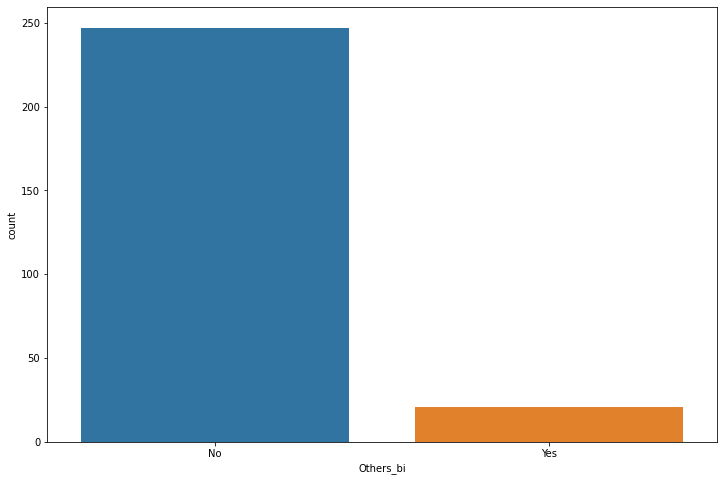

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


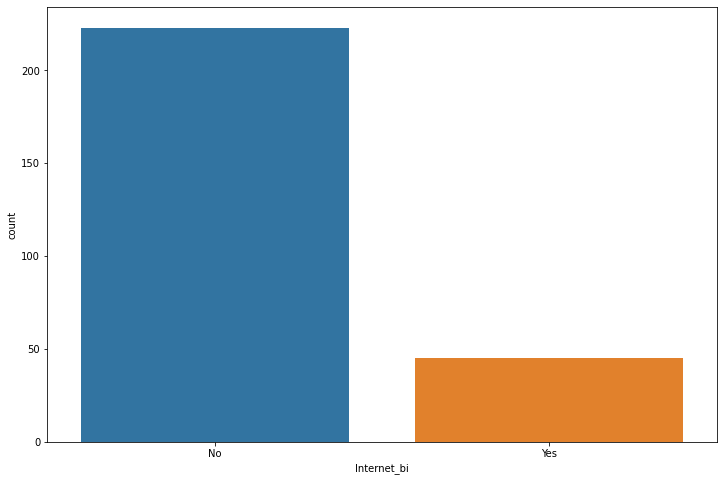

In [8]:
# Step 6: Plot the categorical column values iteratively
for column in df_object.columns:
    plt.figure(figsize = (12,8))
    sns.countplot(df_object[column])
    plt.show()

## Bivariate analysis
We hope you spent time pondering over the univariate analysis performed. In this section, we will perform bivariate analysis, or the analysis between two variables. 

The aim of bivariate analysis (BA) is to investigate the relationship and correlation between the variables. 

We will use three kinds of plotting:
1. numerical variable vs categorical variable = boxplot
2. numerical variable vs numerical variable = scatterplot
3. categorical variable vs categorical variable = contingency table

In [9]:
# Step 7: Get the correlation matrix of your DataFrame
df.corr()

,Age,Age_cate,Stay,Japanese,English,ToDep,ToSC,APD,AHome,APH,...,Friends,Parents,Relative,Profess,Phone,Doctor,Reli,Alone,Others,Internet
Age,1.000000,0.932391,0.302234,-0.133461,0.050873,-0.115263,0.110462,0.057490,-0.022056,-0.013014,...,-0.054481,-0.021119,-0.025270,0.046816,-0.026765,0.047261,0.135979,-0.137415,-0.001961,-0.001132
Age_cate,0.932391,1.000000,0.420833,-0.047012,0.085859,-0.075536,0.085966,0.076982,-0.070844,-0.029781,...,-0.062392,-0.035399,-0.065354,0.024549,-0.045956,0.053559,0.105242,-0.136169,-0.000625,-0.005991
Stay,0.302234,0.420833,1.000000,0.307155,-0.015933,0.051581,-0.037587,0.059174,-0.123386,0.021856,...,0.019637,-0.021692,-0.069792,-0.039987,-0.067336,-0.011302,-0.023514,-0.117616,0.000616,-0.004744
Japanese,-0.133461,-0.047012,0.307155,1.000000,-0.308978,0.036548,0.042755,-0.173587,-0.290113,-0.151483,...,0.110171,0.154005,0.000242,0.063271,0.137827,0.092873,-0.038463,-0.191265,-0.069909,-0.076312
English,0.050873,0.085859,-0.015933,-0.308978,1.000000,-0.036452,-0.074368,0.155636,0.075468,0.112530,...,0.035084,-0.028580,0.026761,0.083922,-0.050024,0.062343,0.046218,0.105538,0.108334,0.043609
ToDep,-0.115263,-0.075536,0.051581,0.036548,-0.036452,1.000000,-0.551795,0.340256,0.168587,0.309254,...,-0.115297,-0.170580,-0.146194,0.063483,0.078878,-0.031114,-0.036490,0.309697,0.241072,0.154078
ToSC,0.110462,0.085966,-0.037587,0.042755,-0.074368,-0.551795,1.000000,-0.529497,-0.237953,-0.424246,...,0.126789,0.176851,0.165179,-0.105633,-0.020279,-0.030819,-0.000166,-0.428907,-0.233147,-0.205616
APD,0.057490,0.076982,0.059174,-0.173587,0.155636,0.340256,-0.529497,1.000000,0.371330,0.647512,...,-0.045776,-0.126569,-0.063106,0.141540,0.113840,0.123260,0.185495,0.266036,0.235916,0.242380
AHome,-0.022056,-0.070844,-0.123386,-0.290113,0.075468,0.168587,-0.237953,0.371330,1.000000,0.397227,...,0.086685,0.167689,0.138730,0.127884,0.091044,-0.008428,0.162899,0.110229,0.192904,0.187404
APH,-0.013014,-0.029781,0.021856,-0.151483,0.112530,0.309254,-0.424246,0.647512,0.397227,1.000000,...,-0.115968,-0.108921,-0.059540,0.081489,0.076090,0.066727,0.143493,0.251594,0.228293,0.121476


### Step 8: Perform BA on ToDep vs ToSC with a scatterplot
From the correlation matrix, we see that there's a negative correlation between ToDep and ToSC (Total social connectedness). 

It makes sense since the more socially connected one is, the lower the depression score. 

Plot a scatterplot between the two variables with either matplotlib.pyplot or seaborn. 

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ToDep', ylabel='ToSC'>

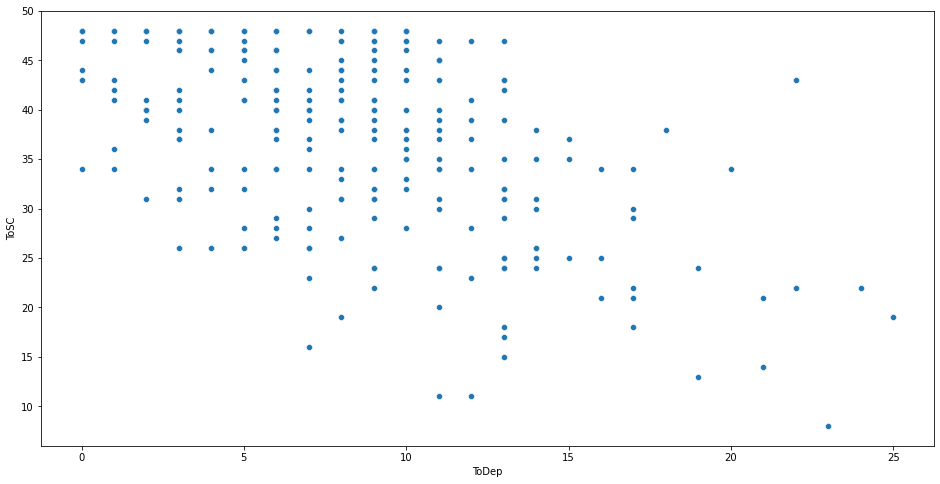

In [10]:
# Step 8: Plot a scatterplot between ToDep vs ToSC 
plt.figure(figsize = (16,8))
sns.scatterplot(df['ToDep'], df['ToSC'])

### Step 9: Perform BA on ToDep vs APD with a scatterplot
Another interesting correlation that we see is a relatively high score between ToDep and APD (perceived discrimination score). 

We can hypothesize that the more discriminated a student feels, the higher the depression score. 

Plot a scatterplot between the two variables.

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ToDep', ylabel='APD'>

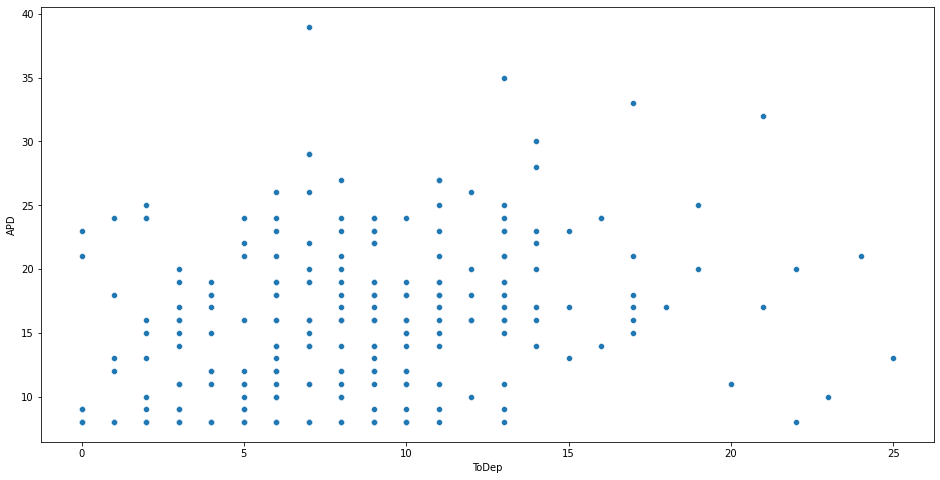

In [11]:
# Step 9: Plot a scatterplot between ToDep and APD
plt.figure(figsize = (16,8))
sns.scatterplot(df['ToDep'], df['APD'])

### Step 10: Perform BA on ToDep vs inter_dom with a boxplot
Let's take a look at whether foreign students experience a higher depression score compared to domestic students. 

We can do this using a boxplot. 

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inter_dom', ylabel='ToDep'>

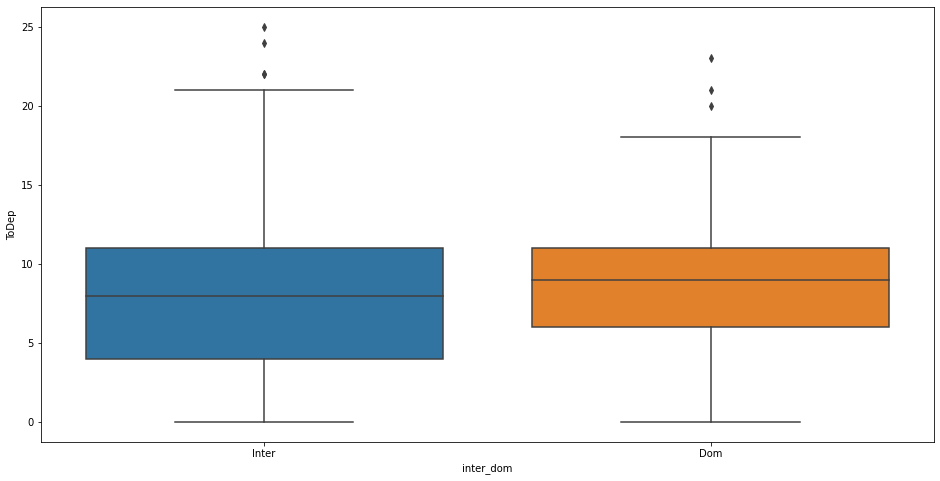

In [12]:
# Step 10: Plot a boxplot between inter_dom and ToDep
plt.figure(figsize = (16,8))
sns.boxplot(df['inter_dom'], df['ToDep'])

### Step 11: Perform an independent t-test between Inter and Dom
The boxes in the boxplot do look the same, but how do we tell that it's different? 

In this case, we can use <strong>STATS</strong>. More specicifically, an independent t-test. A t-test helps to determine whether there is a statistically significant difference between the means in two unrelated groups.

In [13]:
# Step 11a: Import ttest_ind from scipy.stats
from scipy.stats import ttest_ind

# Step 11b: Get a list containing ToDep from 'Inter', and a list containing ToDep from 'Dom'
ToDep_inter = df[df['inter_dom'] == 'Inter']['ToDep']

ToDep_dom = df[df['inter_dom'] == 'Dom']['ToDep']

# Step 11c: Use ttest_ind on the two lists and print the results
ttest_ind(ToDep_dom, ToDep_inter)

Ttest_indResult(statistic=0.8109206006749218, pvalue=0.41813622602092027)

If you do this right, you'll see that the pvalue is larger than 0.05, which means the means of the two groups are the same.

### Step 12: Perform BA on ToDep vs Suicide with a boxplot
For comparison that's very obvious, let's do ToDep vs Suicide. 

In the dataset, Suicide refers to whether the students as had suicide ideation in the past two weeks.

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Suicide', ylabel='ToDep'>

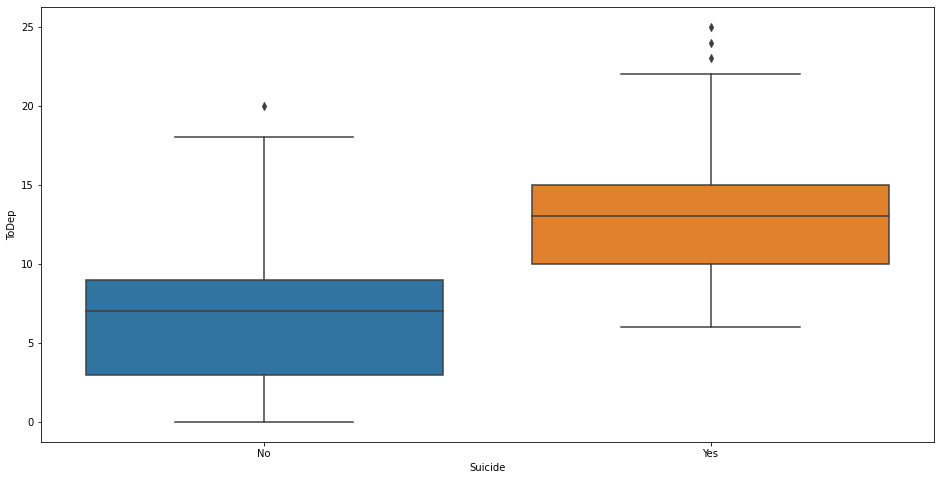

In [14]:
# Step 12: Plot boxplot between Suicide and ToDep
plt.figure(figsize = (16,8))
sns.boxplot(df['Suicide'], df['ToDep'])

### Step 13: Repeat Step 11 on ToDep vs Suicide
The boxplot result should be very obvious in answering whether there is a difference between suicide ideation and the total depressions score. 

However, for confirmation let's perform another independent t-test between the Yes and No groups. 

In [15]:
# Step 13: Repeat the t-test
ToDep_yes = df[df['Suicide'] == 'Yes']['ToDep']

ToDep_no = df[df['Suicide'] == 'No']['ToDep']

ttest_ind(ToDep_no, ToDep_yes)


Ttest_indResult(statistic=-10.589085179497475, pvalue=4.290131684472933e-22)

### Step 14: Perform BA on ToDep vs Gender with a boxplot
You got this - plot the boxplot for ToDep vs Gender and then do a t-test.

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Ttest_indResult(statistic=-0.9285560600922729, pvalue=0.3539610264273153)

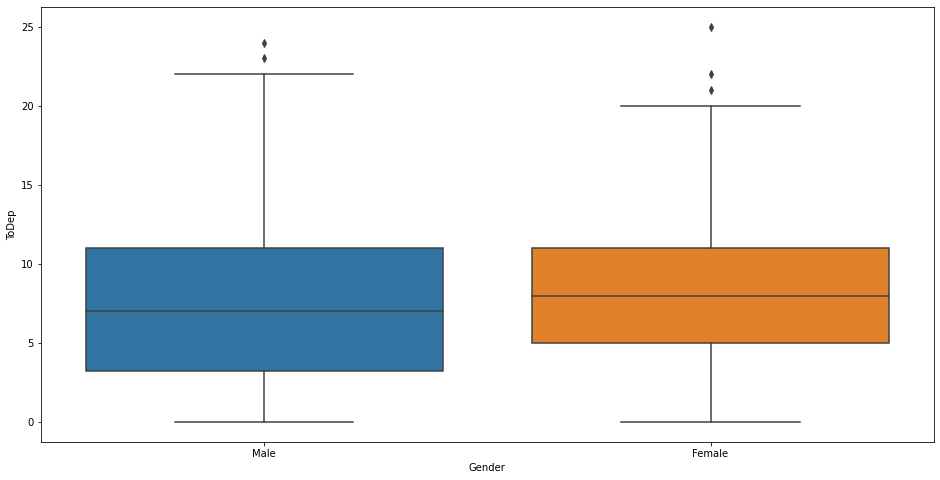

In [16]:
# Step 14a: Plot a boxplot on ToDep vs Gender
plt.figure(figsize = (16,8))
sns.boxplot(df['Gender'], df['ToDep'])

# Step 14b: Print the results of the t-test of ToDep between Male and Female
ToDep_male = df[df['Gender'] == 'Male']['ToDep']

ToDep_female = df[df['Gender'] == 'Female']['ToDep']

ttest_ind(ToDep_male, ToDep_female)

### Step 15: Perform BA on Suicide vs Religion with a contingency table
One of the proposed questions in the article that you can try testing is whether having a religion affects suicide ideation. 

Both 'Religion' and 'Suicide' are categorical values, so let's plot a contingency table first. 

In [17]:
# Step 15: Create a contingency table between Religion and Suicide
contin_table = pd.crosstab(df['Religion'], df['Suicide'])
contin_table

Suicide,No,Yes
Religion,,
No,136,41
Yes,71,20


### Step 16: Perform chi-squared test of independence on the contingency table from Step 15

After we get the contingency table, we will perform a chi-squared test of independence between the two variables. 

In [18]:
# Step 16a: Import chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency
# Step 16b: Calculate chi-square statistics iwth chi2_contingecy
chi2_contingency(contin_table)
# Step 16b: Print the results from 16b

(0.004281240904940765,
 0.9478306895469024,
 1,
 array([[136.71268657,  40.28731343],
        [ 70.28731343,  20.71268657]]))

In [19]:
# Step 16: Try different chi-square analyses
contin_table_intimate = pd.crosstab(df['Intimate'], df['Suicide'])
contin_table_intimate

Suicide,No,Yes
Intimate,,
No,121,36
Yes,79,24


In [20]:
chi2_contingency(contin_table_intimate)

(0.0,
 1.0,
 1,
 array([[120.76923077,  36.23076923],
        [ 79.23076923,  23.76923077]]))

In [21]:
contin_table_dep = pd.crosstab(df['Dep'], df['Suicide'])
contin_table_dep

Suicide,No,Yes
Dep,,
No,151,21
Yes,56,40


In [22]:
chi2_contingency(contin_table_dep)

(28.75790303846256,
 8.201455806276997e-08,
 1,
 array([[132.85074627,  39.14925373],
        [ 74.14925373,  21.85074627]]))

In [23]:
contin_table_alone = pd.crosstab(df['Alone_bi'], df['Suicide'])
contin_table_alone

Suicide,No,Yes
Alone_bi,,
No,169,34
Yes,38,27


In [24]:
chi2_contingency(contin_table_alone)

(15.829028330967525,
 6.933066712472443e-05,
 1,
 array([[156.79477612,  46.20522388],
        [ 50.20522388,  14.79477612]]))